# Predictive Analytics State of Dispair Final Project Fall 2024

## Generic Imports/Data Import

In [1]:
from support import *

c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv(train_path)
submission = pd.read_csv(submission_path, index_col=0)

## EDA

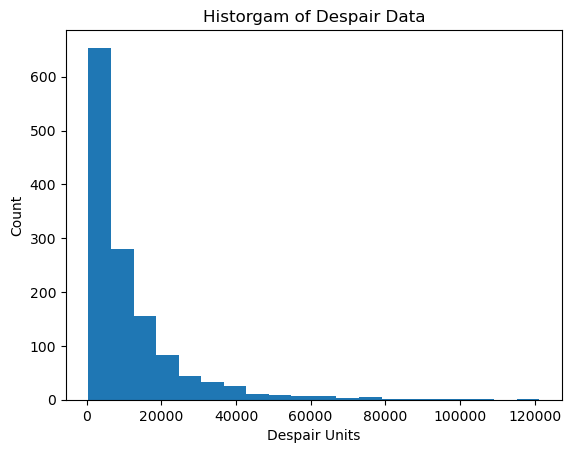

In [3]:
train = train.drop(columns=['id', 'V1', 'V2']).values  # Remove the ID column
observations_reshaped = train.reshape(train.shape[0] * train.shape[1], 1)

plt.hist(observations_reshaped, bins = 20)
plt.title("Historgam of Despair Data")
plt.xlabel("Despair Units")
plt.ylabel("Count")
plt.show()

For the initial model, there was certainly some skewedness that had impacted the results with the many of the lower observations being severely undershot and the higher observaitons being clearly overshot. 

### Analysis on the data:
The data contains both static and dynamic componenets, with the time series aspect being dynamic, changing for every observtion whereas the quantitative variables are both static, staying stagnant throughout all observations. 

## Recurrent Neural Network (RNN) Model

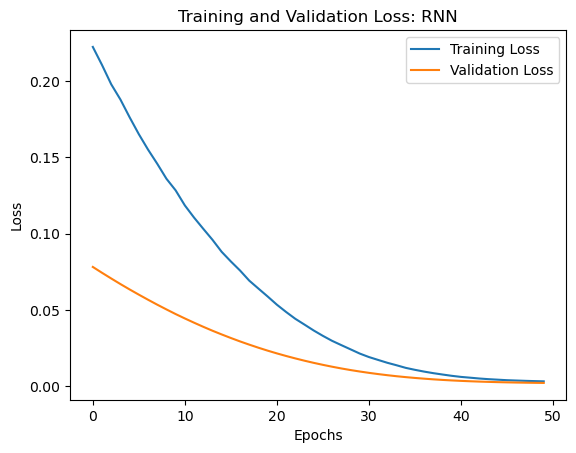

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[   27.43164062]
 [ -575.171875  ]
 [-1127.7265625 ]
 [-2572.02929688]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\Trevo\AppData\Local\Temp\ipykernel_35916\1749170994.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '42030.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.iloc[i] = predictions.reshape(-1)
C:\Users\Trevo\AppData\Local\Temp\ipykernel_35916\1749170994.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43807.9375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.iloc[i] = predictions.reshape(-1)
C:\Users\Trevo\AppData\Local\Temp\ipykernel_35916\1749170994.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44021.3203125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.ilo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[ -39.58740234]
 [-249.67675781]
 [-412.72558594]
 [-375.16601562]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[ 51.9407959 ]
 [ 61.88757324]
 [-41.41699219]
 [ 57.38635254]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[ -17.17797852]
 [-217.59326172]
 [-341.56982422]
 [-509.75610352]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[ -56.03808594]
 [-197.87841797]
 [ -52.29296875]
 [-324.74072266]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[ -93.35839844]
 [-560.17578125]
 [-922.54785156]
 [-234.91015625]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[  -83.20605469]
 [ -496.84082031]
 [-1155.17871094]
 [-2254.27832031]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[  230.12304688]
 [ -732.94238281]
 [ -600.18164062]
 [-2150.109375  ]]
1/1 ━━━━━━━━━━━━━━━

In [4]:
### DONE : ITERATE THROUGH OBSERVATIONS ### 
for i in range(0, len(train)):
    observations = train[i]

    # Show Training Models for the hyperparameter tuning
    rnn_model = build_rnn_model(TIME_STEPS, PREDICT_STEPS, FEATURES)
    rnn_model.compile(optimizer=tf.keras.optimizers.Adam(ALPHA), loss="mse", metrics=["mse"])

    # Globally scale to avoid any descaling conflicts
    scaler = MinMaxScaler()
    observations = scaler.fit_transform(observations.reshape(-1,1))

    X, y = window(observations)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    history = rnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHES, validation_data=(X_test, y_test), verbose=0)


    if i == 0:
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss: RNN')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


    rnn_model_test = build_rnn_model(TIME_STEPS, PREDICT_STEPS, FEATURES)
    rnn_model_test.compile(optimizer=tf.keras.optimizers.Adam(ALPHA), loss="mse", metrics=["mse"])

    history = rnn_model_test.fit(X, y, epochs=EPOCHS, batch_size=BATCHES, verbose=0)


    test_window(X, y, rnn_model_test, scaler, 7)

    test_input = observations[-TIME_STEPS:]
    predictions = test(rnn_model_test, scaler, test_input)

    submission.iloc[i] = predictions.reshape(-1)

Given the sample values, there is cause for concern here on overfitting the data, it should be tested with less iterations and different parameters more systematically if there was more time. 

In [5]:
submission.head()
submission.to_csv(rnn_path)

#### Quick Aside:
Running a bit short on time from other projects, if I get the chance to come back in and read in the qualtiative variables, that would be great. If not... 

## Neural Network (NN) Model

In [6]:
### DONE : ITERATE THROUGH OBSERVATIONS ### 
for i in range(0, len(train)):
    observations = train[i]

    # Show Training Models for the hyperparameter tuning
    nn_model = build_nn_model(TIME_STEPS, PREDICT_STEPS, FEATURES)
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(ALPHA), loss="mse", metrics=["mse"])

    # Globally scale to avoid any descaling conflicts
    scaler = MinMaxScaler()
    observations = scaler.fit_transform(observations.reshape(-1,1))

    X, y = window(observations)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    history = nn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHES, validation_data=(X_test, y_test), verbose=0)

    # Show Test models for the final upload
    nn_model_test = build_nn_model(TIME_STEPS, PREDICT_STEPS, FEATURES)
    nn_model_test.compile(optimizer=tf.keras.optimizers.Adam(ALPHA), loss="mse", metrics=["mse"])

    history = nn_model_test.fit(X, y, epochs=EPOCHS, batch_size=BATCHES, verbose=0)
    
    # DONE : Predict 4 past the last
    test_input = observations[-TIME_STEPS:]
    predictions = test(nn_model_test, scaler, test_input)

    submission.iloc[i] = predictions.reshape(-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

The sample point output should be severe cause for concern being at least 4800 Despair Units below the target value, this points to the NN potentially not being the best selection. 

In [7]:
submission.to_csv(nn_path)
submission.head()

,Y27,Y28,Y29,Y30
id,,,,
1,26495.576172,27726.646484,14136.000000,27162.189453
2,10464.014648,10832.381836,8615.919922,9430.746094
3,2061.971191,466.000000,466.000000,466.000000
4,3818.997070,4514.628418,2959.936768,4783.462891
5,3043.377930,5483.670898,2402.000000,2402.000000


## ETS

In [8]:
for i in range(len(train)):
    observations = train[i]

    observations = np.array(observations).reshape(-1,1)

    train_data = np.array(observations)

    ets_model = ExponentialSmoothing(train_data,trend='mul', seasonal='mul', seasonal_periods=3).fit()
    ets_predictions = ets_model.forecast(PREDICT_STEPS)

    submission.loc[i+1] = ets_predictions.reshape(-1)

c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: ov

In [9]:
submission.to_csv(ets_path)
submission.head()

,Y27,Y28,Y29,Y30
id,,,,
1,44180.253267,46087.644962,48460.786692,50365.970765
2,15680.813181,16256.531461,17217.319741,17777.741143
3,2631.198231,2789.186464,2934.658695,3088.667505
4,7505.753114,7951.108050,8425.985556,9044.202838
5,9671.653840,10223.453568,10752.220413,11333.569044


## Autoregressive Integrated Moving Average (ARIMA) Model

In [10]:
for i in range(len(train)):
    observations = train[i]

    observations = np.array(observations)

    arima_model = AutoARIMA(season_length=3).fit(observations)
    arima_predictions = arima_model.predict(PREDICT_STEPS)

    submission.iloc[i] = arima_predictions['mean']
    print(arima_string(arima_model.model_))

ARIMA(2,2,0)                   
ARIMA(0,1,0) with drift        
ARIMA(0,2,1)                   
ARIMA(0,2,1)                   
ARIMA(0,2,0)                   
ARIMA(0,2,1)                   
ARIMA(1,1,0) with drift        
ARIMA(1,2,0)(0,0,1)[3]                   
ARIMA(0,2,0)                   
ARIMA(0,1,0)(0,0,1)[3] with drift        
ARIMA(1,2,0)(0,0,1)[3]                   
ARIMA(0,2,1)                   
ARIMA(0,2,1)(0,0,1)[3]                   
ARIMA(0,2,1)                   
ARIMA(0,2,0)(0,0,1)[3]                   
ARIMA(0,2,0)                   
ARIMA(0,2,1)(1,0,0)[3]                   
ARIMA(0,2,1)                   
ARIMA(0,1,0) with drift        
ARIMA(0,2,1)                   
ARIMA(1,2,0)(0,0,1)[3]                   
ARIMA(0,1,2) with drift        
ARIMA(0,2,0)(1,0,0)[3]                   
ARIMA(0,2,1)(0,0,1)[3]                   
ARIMA(0,2,1)                   
ARIMA(1,1,0) with drift        
ARIMA(1,2,1)                   
ARIMA(0,2,1)(0,0,1)[3]                   
ARIM

It is clear that this model is able to more uniquely assess which hyperparameters benefit the individual sample as opposed to the ETS' blanket coverage of (A,A,N). It will be interesting to see the test performance. It is interesting, though to see that it is inconsistant with the selection of seasonality. However, I do have some doubts that (A,A,N) is the best solution here because of the undershooting NN performing so poorly. Trying a more exponential ETS model with a multiplicative trend may not be a bad idea. 

In [11]:
submission
submission.to_csv(arima_path)
submission.head()

,Y27,Y28,Y29,Y30
id,,,,
1,43759.651846,45037.865851,46699.793150,48033.784591
2,15592.360000,15998.720000,16405.080000,16811.440000
3,2618.377167,2736.754334,2855.131501,2973.508668
4,7371.476570,7739.953140,8108.429710,8476.906280
5,9864.000000,10551.000000,11238.000000,11925.000000


## Graphage

In [12]:
# TODO : Import all submissions
arima_predictions = pd.read_csv(arima_path)
ets_predictions = pd.read_csv(ets_path)
rnn_predictions = pd.read_csv(rnn_path)
nn_predictions = pd.read_csv(nn_path)

In [13]:
predict_index = 23

arima_pred = arima_predictions.iloc[predict_index]
ets_pred = ets_predictions.iloc[predict_index]
rnn_pred = rnn_predictions.iloc[predict_index]
nn_pred = nn_predictions.iloc[predict_index]

predictions_df = pd.DataFrame({"ARIMA" : arima_pred, "ETS" : ets_pred, "RNN" : rnn_pred, "NN" : nn_pred})
predictions_df = predictions_df.drop("id", axis=0)
predictions_df.index = range(26,30)
predictions_df

,ARIMA,ETS,RNN,NN
26,83632.966668,83380.739683,67164.507812,24556.000000
27,86935.117828,87305.258560,79809.007812,51251.003906
28,93280.014503,90795.185107,75398.531250,60682.171875
29,97407.806906,94958.966015,83853.703125,58574.410156


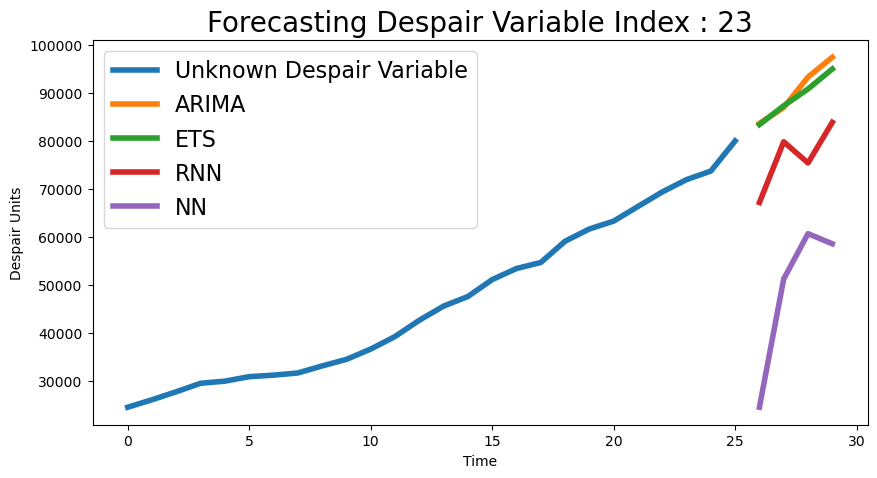

In [14]:
known_df = pd.DataFrame(train[predict_index])

plt.figure(figsize=(10, 5))

plt.plot(known_df, label=('Unknown Despair Variable'), linewidth = 4)
for column in predictions_df.columns:
    plt.plot(predictions_df[column], label = column, linewidth = 4)
plt.title('Forecasting Despair Variable Index : 23', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Despair Units')
plt.legend(fontsize = 16)

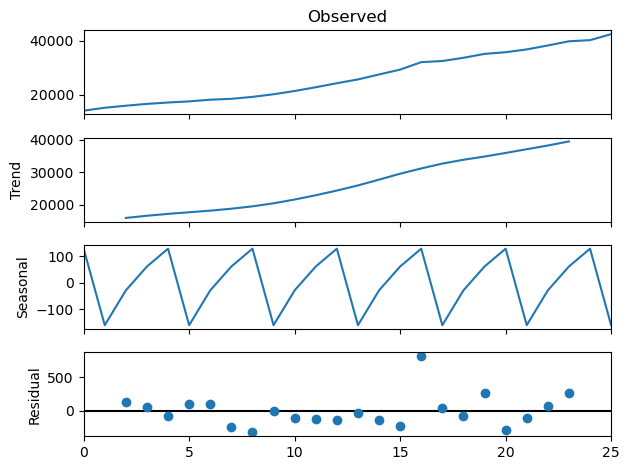

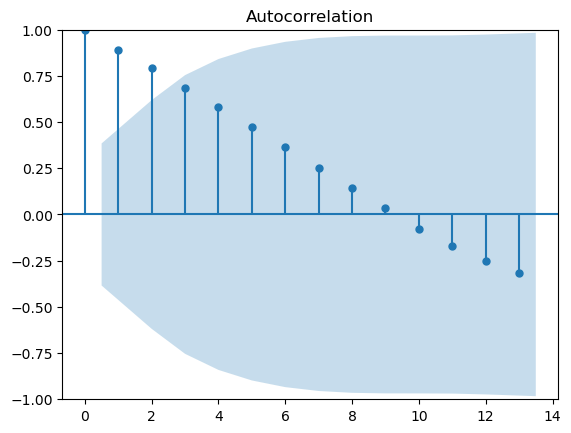

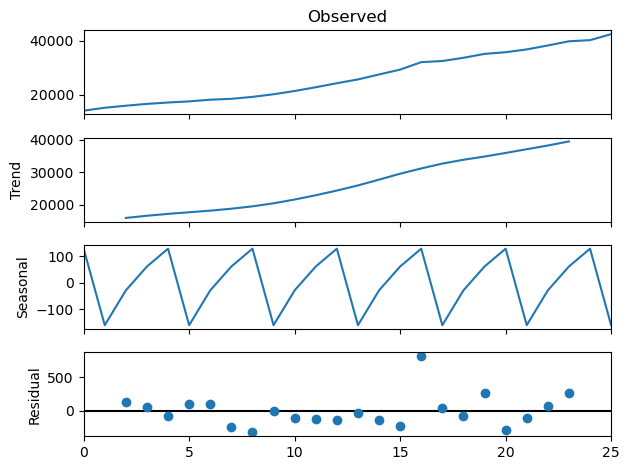

In [15]:
plot_acf(train[0], alpha=0.05)
dcp = seasonal_decompose(train[0], period=4)
dcp.plot()

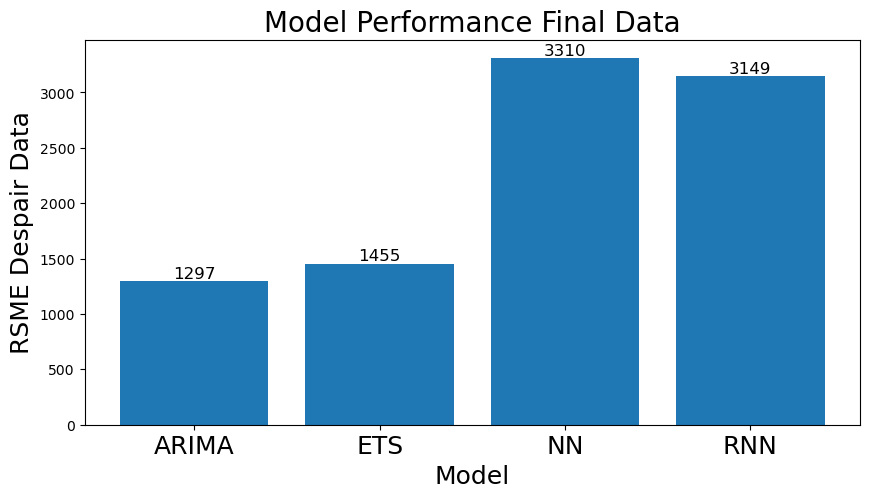

In [16]:
results = {"ARIMA" : 1297, "ETS"  : 1455, "NN" : 3310, "RNN" : 3149}

model = results.keys()
values = results.values()

fig = plt.figure(figsize=(10, 5))
plt.xlabel("Model", fontsize = 18)
plt.ylabel("RSME Despair Data", fontsize = 18)
plt.title("Model Performance Final Data", fontsize = 20)
bars = plt.bar(model, values)
plt.bar_label(bars, fontsize = 12)
plt.xticks(fontsize=18)
plt.show()